<a href="https://colab.research.google.com/github/nazarcoder123/Retail-stores-sales-and-profit/blob/main/retail_store_sales_and_profit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT: SUPERSTORE SALES AND PROFIT ANALYSIS

### Objective: To gain insights into the sales and profit performance of different product categories in the Superstore dataset, identify trends or patterns, and visualize the data to facilitate data-driven decision-making.
##### This analysis aims to answer the following questions:
##### Which product categories generate the highest sales and profit for the Superstore?
##### Which product categories are consistently unprofitable or underperforming?
##### What are the trends or patterns in sales and profit over time?
##### what actionable insights can be derived to optimize sales and profit?

### Step 1
#### Data Exploration: Load the Superstore dataset and examines the first few rows and summary statistics to understand its structure and characteristics.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Sample - Superstore.csv', encoding='ISO-8859-1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
# view the data type for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [3]:
# statistical summaryof the data
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Step 2
#### Data Cleaning: Check for missing values, remove duplicates and handle any data cleaning tasks as needed to ensure data quality.

In [4]:
# Check for missing values
print(data.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [5]:
# Remove duplicates
data.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


### Step 3
#### Data analysis and Visualization

In [6]:
# convert date columns into month and years
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

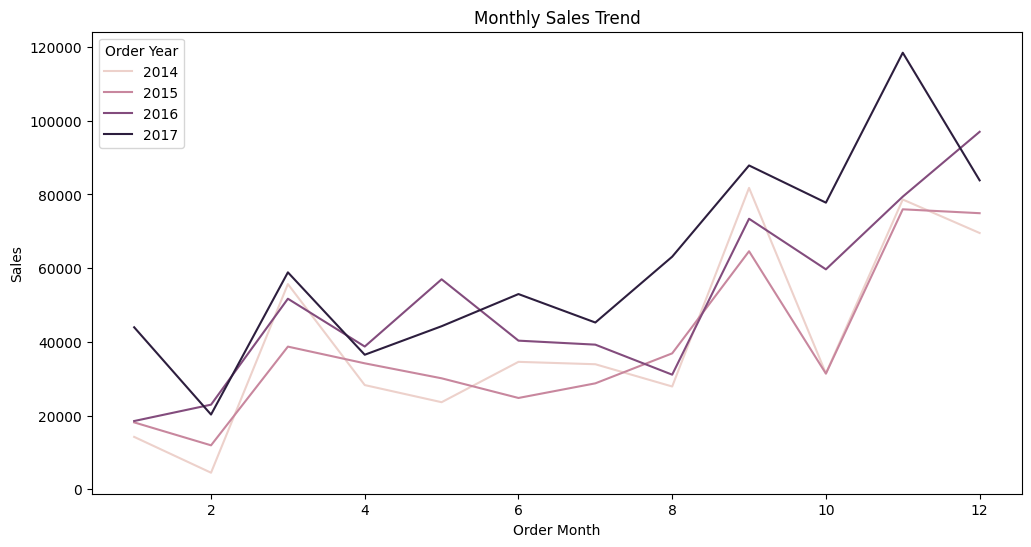

In [7]:
# Monthly sales trend
sales_by_month = data.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=sales_by_month, x='Order Month', y='Sales', hue='Order Year')
plt.title('Monthly Sales Trend')
plt.show()

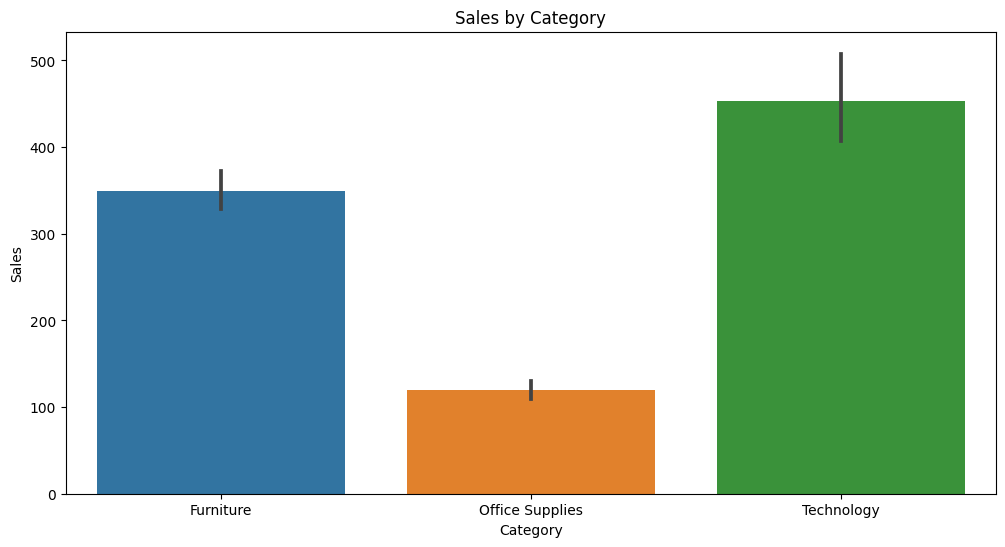

In [8]:
# Sales by Category
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='Category', y='Sales')
plt.title('Sales by Category')
plt.show()

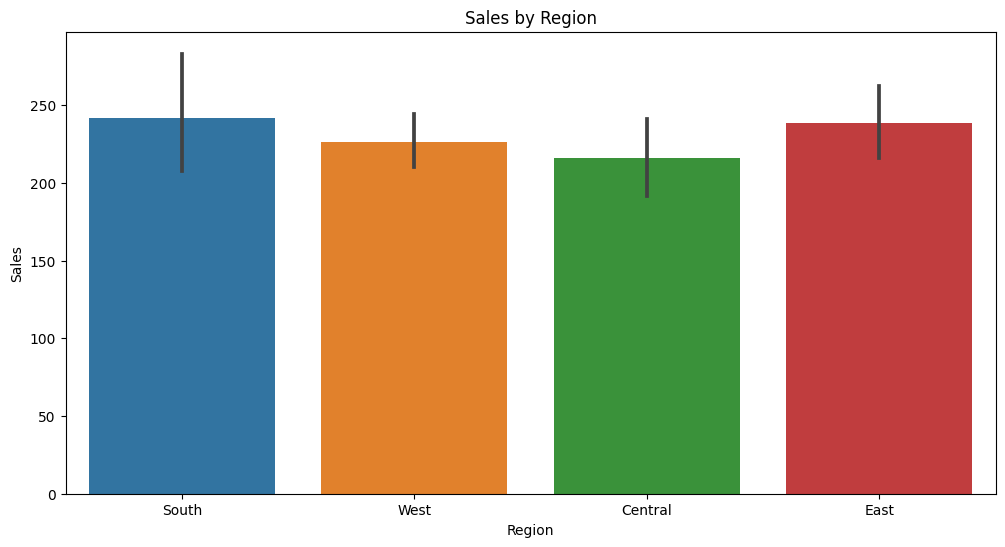

In [9]:
# Sales by Region
sales_by_subcategory = data.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='Region', y='Sales')
plt.title('Sales by Region')
plt.show()

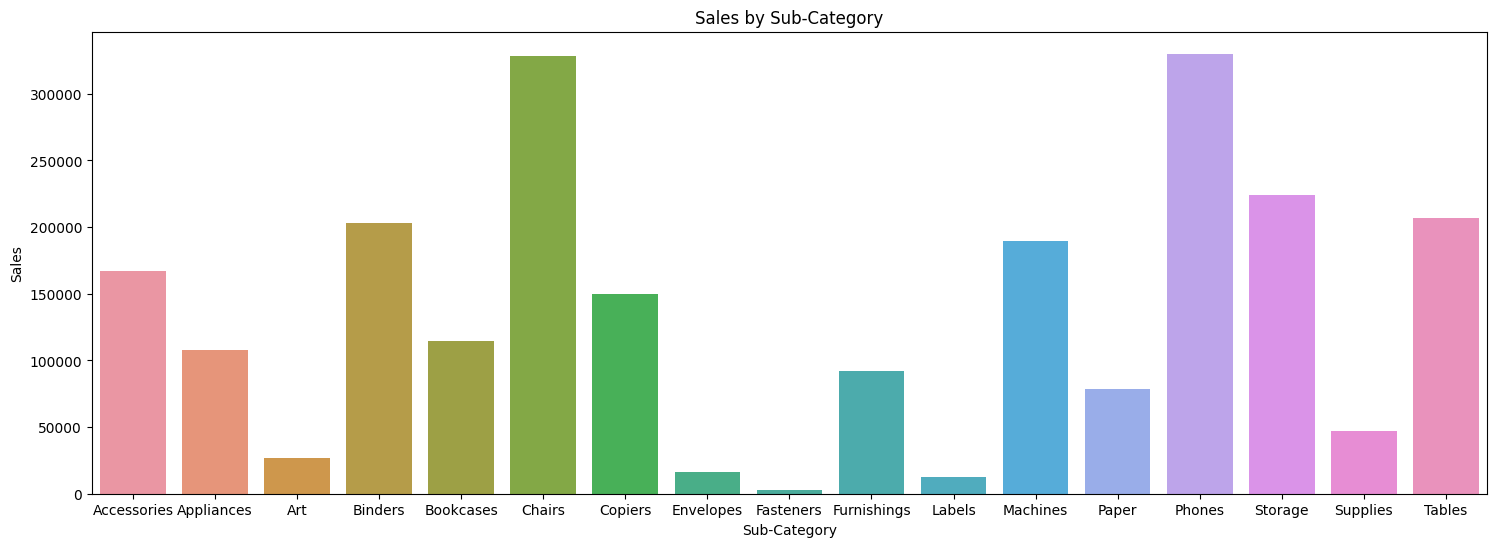

In [10]:
# Sales by sub-category
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()
plt.figure(figsize=(18,6))
sns.barplot(data=sales_by_subcategory, x='Sub-Category', y='Sales')
plt.title('Sales by Sub-Category')
plt.show()

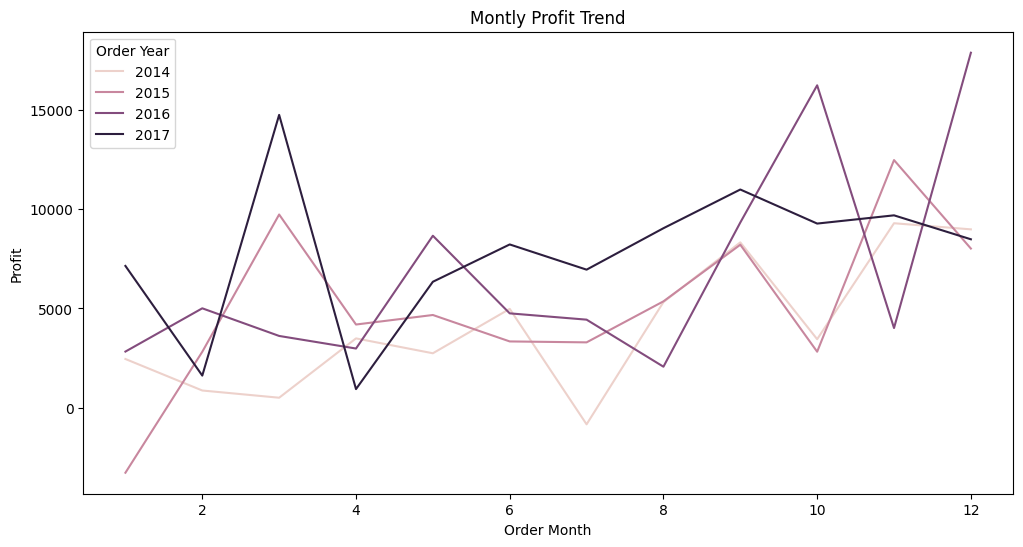

In [11]:
# Monthly Profit trend
profit_by_month = data.groupby(['Order Year', 'Order Month'])['Profit'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=profit_by_month, x='Order Month', y='Profit', hue='Order Year')
plt.title('Montly Profit Trend')
plt.show()

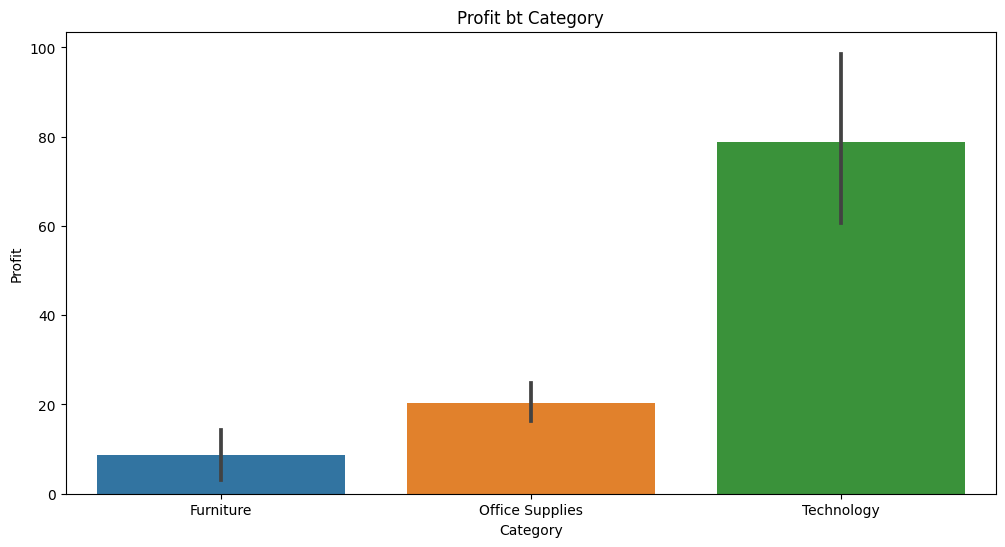

In [12]:
#Profit by Category
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='Category', y='Profit')
plt.title('Profit bt Category')
plt.show()

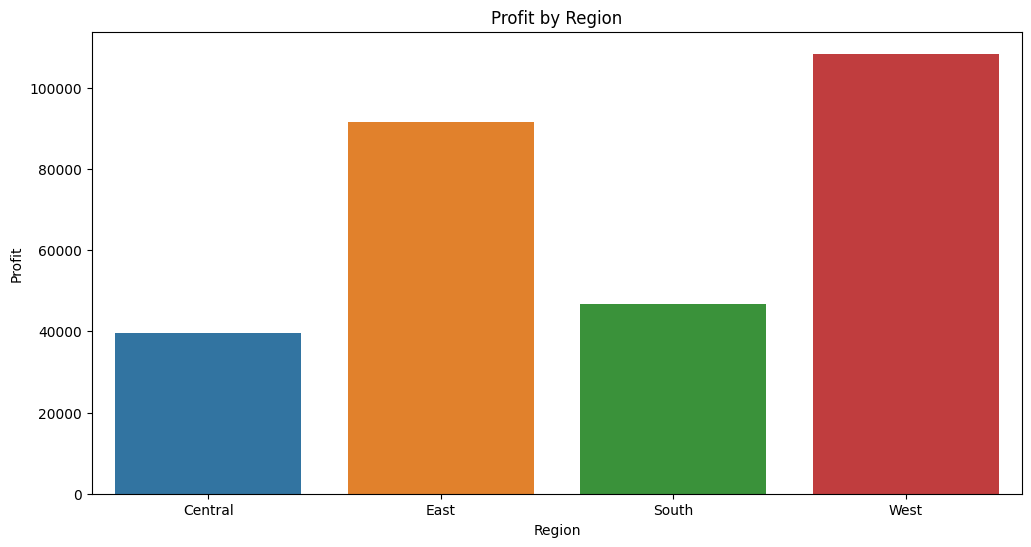

In [13]:
# Profit by Region
profit_by_region = data.groupby('Region')['Profit'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=profit_by_region, x='Region', y='Profit')
plt.title('Profit by Region')
plt.show()

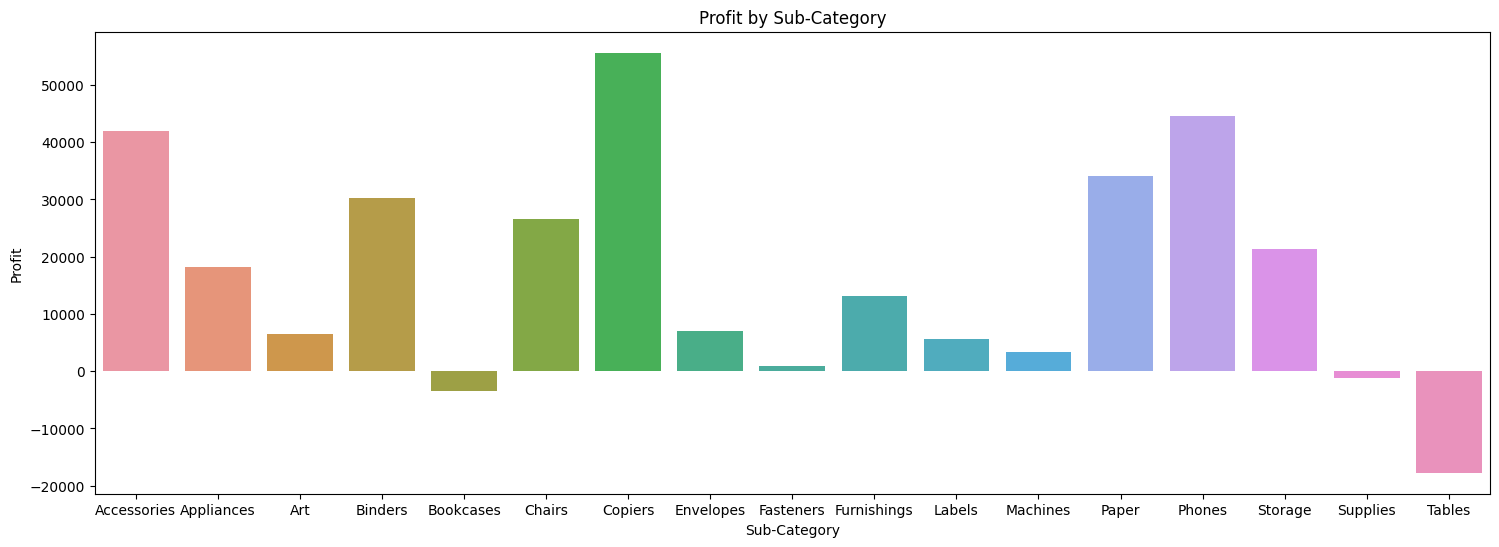

In [14]:
# Profit by Sub-Category
profit_by_subcategory = data.groupby('Sub-Category')['Profit'].sum().reset_index()
plt.figure(figsize=(18,6))
sns.barplot(data=profit_by_subcategory, x='Sub-Category', y='Profit')
plt.title('Profit by Sub-Category')
plt.show()